In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
Image_Size = 256
Batch_Size = 32
Channels = 32

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage', shuffle = True, image_size = (Image_Size, Image_Size), 
    batch_size = Batch_Size
    )

Found 2152 files belonging to 3 classes.


In [9]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [11]:
Class_Names = dataset.class_names
Class_Names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
#Batches = 32. Files = 2152. Files/Batches = 67.25
len(dataset)

68

In [ ]:
#Actual length is 68*32, because each element of thr 68 is a batch of 32

In [15]:
for image_batch, label_batch in dataset.take(1):    #dataset was created as pairs of (image, label)
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 0 2 1 0 0 0 0 1 1 0 0 2 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0]


In [17]:
print(type(image_batch))
print(type(label_batch))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [19]:
image_batch[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[142., 133., 136.],
        [143., 134., 137.],
        [144., 135., 138.],
        ...,
        [166., 160., 162.],
        [172., 166., 168.],
        [174., 168., 170.]],

       [[153., 144., 147.],
        [151., 142., 145.],
        [148., 139., 142.],
        ...,
        [165., 159., 161.],
        [170., 164., 166.],
        [173., 167., 169.]],

       [[150., 141., 144.],
        [149., 140., 143.],
        [148., 139., 142.],
        ...,
        [167., 161., 163.],
        [170., 164., 166.],
        [171., 165., 167.]],

       ...,

       [[140., 128., 128.],
        [158., 146., 146.],
        [133., 121., 121.],
        ...,
        [181., 170., 174.],
        [138., 127., 131.],
        [121., 110., 114.]],

       [[108.,  96.,  96.],
        [114., 102., 102.],
        [108.,  96.,  96.],
        ...,
        [155., 144., 148.],
        [158., 147., 151.],
        [157., 146., 150.]],

       [[139., 12

In [21]:
image_batch[0].shape

TensorShape([256, 256, 3])

In [23]:
image_batch[0].numpy()

array([[[142., 133., 136.],
        [143., 134., 137.],
        [144., 135., 138.],
        ...,
        [166., 160., 162.],
        [172., 166., 168.],
        [174., 168., 170.]],

       [[153., 144., 147.],
        [151., 142., 145.],
        [148., 139., 142.],
        ...,
        [165., 159., 161.],
        [170., 164., 166.],
        [173., 167., 169.]],

       [[150., 141., 144.],
        [149., 140., 143.],
        [148., 139., 142.],
        ...,
        [167., 161., 163.],
        [170., 164., 166.],
        [171., 165., 167.]],

       ...,

       [[140., 128., 128.],
        [158., 146., 146.],
        [133., 121., 121.],
        ...,
        [181., 170., 174.],
        [138., 127., 131.],
        [121., 110., 114.]],

       [[108.,  96.,  96.],
        [114., 102., 102.],
        [108.,  96.,  96.],
        ...,
        [155., 144., 148.],
        [158., 147., 151.],
        [157., 146., 150.]],

       [[139., 127., 127.],
        [113., 101., 101.],
        [139., 1

In [25]:
image_batch[:2].numpy()    #Notice the increase in dimension

array([[[[142., 133., 136.],
         [143., 134., 137.],
         [144., 135., 138.],
         ...,
         [166., 160., 162.],
         [172., 166., 168.],
         [174., 168., 170.]],

        [[153., 144., 147.],
         [151., 142., 145.],
         [148., 139., 142.],
         ...,
         [165., 159., 161.],
         [170., 164., 166.],
         [173., 167., 169.]],

        [[150., 141., 144.],
         [149., 140., 143.],
         [148., 139., 142.],
         ...,
         [167., 161., 163.],
         [170., 164., 166.],
         [171., 165., 167.]],

        ...,

        [[140., 128., 128.],
         [158., 146., 146.],
         [133., 121., 121.],
         ...,
         [181., 170., 174.],
         [138., 127., 131.],
         [121., 110., 114.]],

        [[108.,  96.,  96.],
         [114., 102., 102.],
         [108.,  96.,  96.],
         ...,
         [155., 144., 148.],
         [158., 147., 151.],
         [157., 146., 150.]],

        [[139., 127., 127.],
       

(-0.5, 255.5, 255.5, -0.5)

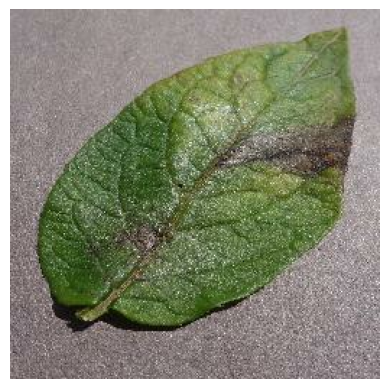

In [39]:
plt.imshow(image_batch[0].numpy().astype('uint8'))
plt.axis("off")

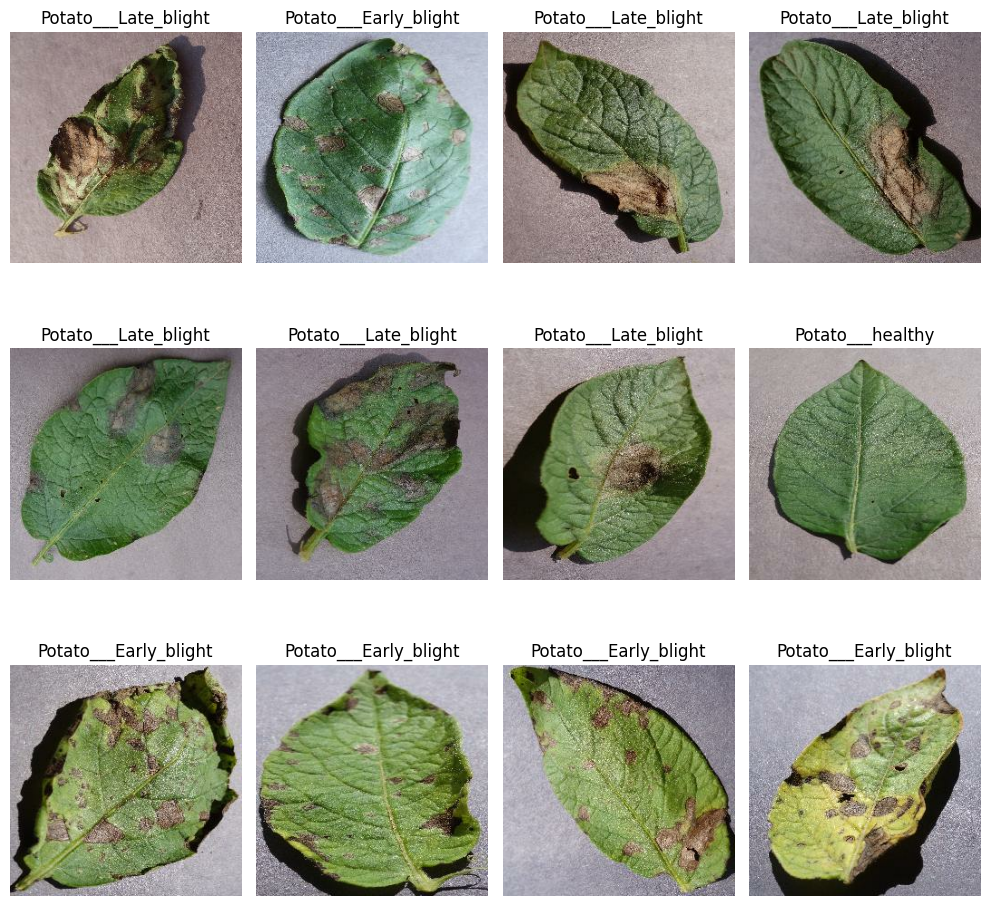

In [82]:
plt.figure(figsize = (10, 10))
for image, label in dataset.take(1):
    for i in range(0, 12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))    #New images everytime
        plt.title(Class_Names[label[i]])
        plt.axis('off')
plt.tight_layout()

In [ ]:
#80% ==> Train
#20% ==> 10% Validation, 10% Test

In [84]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [86]:
train_dataset = dataset.take(54)
len(train_dataset)

54

In [88]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [90]:
validation_size = 0.1
len(dataset) * validation_size

6.800000000000001

In [92]:
validation_dataset = test_dataset.take(6)
len(validation_dataset)

6

In [96]:
def get_data_partitions_tf(ds, train_split = 0.8, validation_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
        ds_size = len(ds)
        if shuffle:
            ds = ds.shuffle(shuffle_size, seed = 12)
            
        train_size = int(train_split * ds_size)
        val_size = int(validation_split * ds_size)

        train_ds = ds.take(train_size)

        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
    
        return train_ds, val_ds, test_ds

In [98]:
train_dataset, validation_dataset, test_dataset = get_data_partitions_tf(dataset)

In [100]:
len(train_dataset)

54

In [104]:
len(validation_dataset)

6

In [106]:
len(test_dataset)

8

In [108]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [110]:
#PreProcessing:

In [114]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [116]:
 #Data Augmentation

In [118]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
s